In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import requests
import time
import json

master_csv = "archive/Master.csv"
salaries_csv = "archive/Salaries.csv"

In [2]:
#read in csv files
master_df = pd.read_csv(master_csv)
salaries_df = pd.read_csv(salaries_csv)


# Combine the data into a single dataset
bball_data_merge = pd.merge(master_df, salaries_df, how="left", on="playerID")

# Display the data table for preview
bball_data_merge.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2010.0,SEA,AL,2750000.0


In [3]:
#drop unneed columns
cleaned_df = bball_data_merge.drop(['birthMonth',
                                    'birthDay',
                                    'deathYear',
                                    'deathMonth',
                                    'deathDay',
                                    'deathCountry',
                                    'deathState',
                                    'deathCity',
                                    'nameFirst',
                                    'nameLast',
                                    'nameGiven',
                                    'weight',
                                    'height',
                                    'bats',
                                    'throws',
                                    'debut',
                                    'finalGame',
                                    'retroID',
                                    'bbrefID',                                   
                                     ], axis = 1)

cleaned_df.head()

,playerID,birthYear,birthCountry,birthState,birthCity,yearID,teamID,lgID,salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0


In [4]:
#Rename cleaned_df columns and change df to salary_df
salary_df = cleaned_df.rename(columns={'playerID': 'Player ID',
                                         'birthYear': 'Birth Year',
                                         'birthCountry': 'Birth Country',
                                         'birthState': 'Birth State',
                                         'birthCity': 'Birth City',
                                         'yearID': 'Year ID',
                                         'teamID': 'Team ID',
                                         'lgID': 'League',
                                         'salary':'Salary'
                                     })

#Narrow down dataset to 2000 - 2015 years and remove NaN values in Salary column
salary_df = salary_df.loc[salary_df['Salary'].isnull() == False]
salary_df = salary_df.loc[salary_df['Year ID'] > 1999]
salary_df = pd.DataFrame(salary_df)
salary_df.head()

,Player ID,Birth Year,Birth Country,Birth State,Birth City,Year ID,Team ID,League,Salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0


In [6]:
#group by birth country (highest level of distribution of players)
birth_country = salary_df.groupby(['Birth Country'])

#create each variable
player_count = birth_country['Player ID'].nunique()
mean_salary = birth_country.mean()['Salary']
median_salary = birth_country.median()['Salary']
max_salary = birth_country['Salary'].max()
min_salary = birth_country['Salary'].min()
var_salary = birth_country.var()['Salary']
std_dev_salary = birth_country.std()['Salary']
sems_salary = birth_country.sem()['Salary']

#player birth country summary table
summary_country_df = pd.DataFrame({"Number of Unique Players": player_count,
                                   "Average Player Salary": mean_salary,
                                   "Median Player Salary": median_salary,
                                   "Max Player Salary": max_salary,
                                   "Min Player Salary": min_salary,
                                   "Player Salary Variance": var_salary,
                                   "Player Salary Std. Dev.": std_dev_salary,
                                   "Player Salary Std. Error": sems_salary})

#format columns
summary_country_df = summary_country_df.sort_values(by=['Number of Unique Players'], ascending=False)
summary_country_df['Average Player Salary'] = summary_country_df['Average Player Salary'].map("${:,.0f}".format)
summary_country_df['Median Player Salary'] = summary_country_df['Median Player Salary'].map("${:,.0f}".format)
summary_country_df['Max Player Salary'] = summary_country_df['Max Player Salary'].map("${:,.0f}".format)
summary_country_df['Min Player Salary'] = summary_country_df['Min Player Salary'].map("${:,.0f}".format)
summary_country_df['Player Salary Variance'] = summary_country_df['Player Salary Variance'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Dev.'] = summary_country_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Error'] = summary_country_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_country_df = summary_country_df.reset_index()
summary_country_df

,Birth Country,Number of Unique Players,Average Player Salary,Median Player Salary,Max Player Salary,Min Player Salary,Player Salary Variance,Player Salary Std. Dev.,Player Salary Std. Error
0,USA,2326,"$2,947,412","$1,000,000","$33,000,000","$200,000","$16,752,378,715,366","$4,092,967","$41,702"
1,D.R.,314,"$3,279,718","$1,025,000","$24,000,000","$200,000","$20,175,008,229,502","$4,491,660","$123,676"
2,Venezuela,172,"$2,989,871","$850,000","$24,857,000","$165,574","$19,403,512,906,123","$4,404,942","$156,622"
3,P.R.,81,"$3,611,600","$1,412,500","$19,700,000","$200,000","$19,742,473,543,067","$4,443,250","$216,294"
4,CAN,48,"$3,391,683","$1,375,000","$18,910,655","$200,000","$18,591,768,220,585","$4,311,817","$300,419"
5,Japan,46,"$4,900,168","$3,250,000","$22,000,000","$212,000","$22,504,246,432,235","$4,743,864","$355,568"
6,Mexico,42,"$2,006,542","$900,000","$14,000,000","$200,000","$6,784,818,402,732","$2,604,768","$183,271"
7,Cuba,41,"$3,336,567","$2,583,334","$10,500,000","$200,000","$8,306,772,452,874","$2,882,147","$225,058"
8,Panama,19,"$4,195,637","$1,043,750","$19,000,000","$200,000","$29,082,384,305,181","$5,392,809","$562,239"
9,South Korea,14,"$3,504,940","$762,500","$15,505,142","$210,000","$22,241,507,750,835","$4,716,090","$687,912"


In [7]:
# Save country summary df as a csv
output_salary_summary = summary_country_df
# Note to avoid any issues later, use encoding="utf-8"
output_salary_summary.to_csv("output/country_salary_summary_WJR.csv", encoding="utf-8", index=False)

In [8]:
# Calculate quartiles, IQR, and identify potential outliers for top 8 countries.
##############################################################################
# Put countries into a list for for loop (and later for plot labels)
countries = ["USA", "D.R.", "Venezuela", "P.R.", "CAN", "Japan", "Mexico", "Cuba"]

# Create empty list to fill with salary data (for plotting)
salary_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for country in countries:
    
    # Locate the rows which contain a player for each contry and get the salary
    avg_salary_data = salary_df.loc[salary_df["Birth Country"] == country, 'Salary']
    
    # add subset 
    salary_data.append(avg_salary_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = avg_salary_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = avg_salary_data.loc[(avg_salary_data < lower_bound) | (avg_salary_data > upper_bound)]
    print(f"{country} has {len(outliers)} outliers out of {len(avg_salary_data)} or {(len(outliers) / len(avg_salary_data))*100}% of total data volume.")
    

USA has 801 outliers out of 9633 or 8.315166614761758% of total data volume.
D.R. has 133 outliers out of 1319 or 10.083396512509477% of total data volume.
Venezuela has 79 outliers out of 791 or 9.987357774968395% of total data volume.
P.R. has 40 outliers out of 422 or 9.47867298578199% of total data volume.
CAN has 21 outliers out of 206 or 10.194174757281553% of total data volume.
Japan has 11 outliers out of 178 or 6.179775280898876% of total data volume.
Mexico has 23 outliers out of 202 or 11.386138613861387% of total data volume.
Cuba has 0 outliers out of 164 or 0.0% of total data volume.


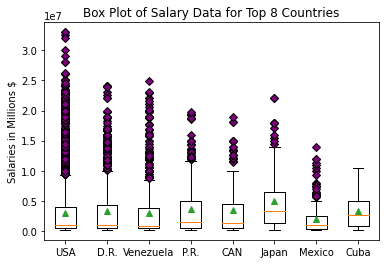

In [9]:
# Box plot for each country for the salary and outlier data above

#box plot of Salary Data for Top 8 Countries
outlier_format = dict(markerfacecolor = 'purple', marker='D', markeredgecolor='black')
plt.boxplot(salary_data, labels = countries, flierprops = outlier_format, showmeans = True)
plt.title("Box Plot of Salary Data for Top 8 Countries")
plt.ylabel('Salaries in Millions $')
plt.savefig('output/Box Plot of Salary Data for Top 8 Countries.png')

plt.show()

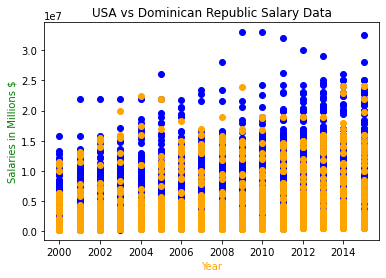

In [10]:
#create variables to loc in on certain countries
usa_salary_df = salary_df.loc[salary_df['Birth Country'] == 'USA']
dr_salary_df = salary_df.loc[salary_df['Birth Country'] == 'D.R.']
ven_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Venezuela']
pr_salary_df = salary_df.loc[salary_df['Birth Country'] == 'P.R.']
can_salary_df = salary_df.loc[salary_df['Birth Country'] == 'CAN']
jap_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Japan']
mex_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Mexico']
cuba_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Cuba']

#scatter plot USA vs D.R.
plt.scatter(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "blue", label='USA')
plt.scatter(dr_salary_df['Year ID'], dr_salary_df['Salary'], color = "orange", label='Dominican Republic')
plt.title("USA vs Dominican Republic Salary Data")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salaries in Millions $", color = "green")
plt.savefig('output/USA vs Dominican Republic Salary Data.png')

plt.show()

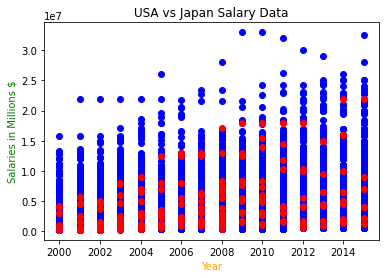

In [11]:
#scatter plot USA vs Japan
plt.scatter(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "blue", label='USA')
plt.scatter(jap_salary_df['Year ID'], jap_salary_df['Salary'], color = "red", label='Japan')
plt.title("USA vs Japan Salary Data")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salaries in Millions $", color = "green")
plt.savefig('output/USA vs Japan Salary Data.png')

plt.show()

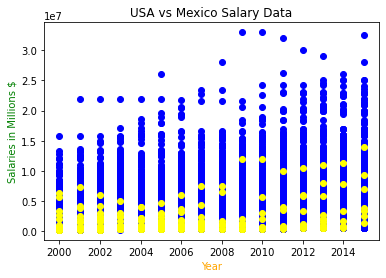

In [12]:
#scatter plot USA vs Mexico
plt.scatter(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "blue", label='USA')
plt.scatter(mex_salary_df['Year ID'], mex_salary_df['Salary'], color = "yellow", label='Mexico')
plt.title("USA vs Mexico Salary Data")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salaries in Millions $", color = "green")
plt.savefig('output/USA vs Mexico Salary Data')

plt.show()

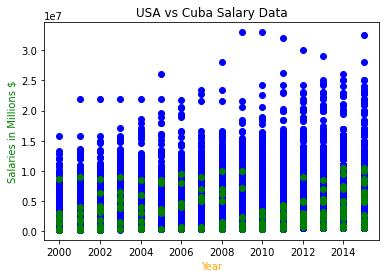

In [13]:
#scatter plot USA vs Cuba
plt.scatter(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "blue", label='USA')
plt.scatter(cuba_salary_df['Year ID'], cuba_salary_df['Salary'], color = "green", label='Cuba')
plt.title("USA vs Cuba Salary Data")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salaries in Millions $", color = "green")
plt.savefig('output/USA vs Cuba Salary Data')

plt.show()